## 2.3 NumPy 数组的计算: 通用函数
##### 本笔记根据<<数据科学手册>> Python Data Science Handbook一书整理.
NumPy提供了一个简单灵活的接口来优化数据数组的计算.NumPy数组的计算有时候非常快, 有时候非常慢.快的原因是利用了向量化操作.通常在NumPy的通用函数(ufunc)中实现.能提高数组元素重复计算的效率.

### 2.3.1 缓慢的循环
许多小的操作需要不断的重复的时候,导致Python运行缓慢, 比如对数组的每个元素进行循环操作.

对数组的每个元素进行求倒数操作

In [18]:
import numpy as np
np.random.seed(0)

def daoshu(values):
    output = np.empty(len(values))    # 把m写成了n,犯错
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output
values = np.random.randint(1,10,size=5)
daoshu(values)                        # 可以 help(np.empth) 或 help(np.random.randint)需求帮助

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

In [12]:
# 换一种写法 ,返回的是一个序列
import numpy as np
np.random.seed(0)

def daoshu(values):
    output = []
    for i in values:
        output.append(1.0 / values[i]) 
    return output
values = np.random.randint(1,10,size=9)         #为什么size变成9以下的时候会报错呢?
daoshu(values)

[0.16666666666666666,
 1.0,
 0.125,
 0.125,
 0.2,
 0.125,
 0.16666666666666666,
 0.25,
 0.25]

### 2.3.2 通用函数介绍
NumPy为很多类型的操作提供了非常方便的,静态类型的,可编译程序的接口,也别称作***向量操作***
NumPy中向量操作是通过***通用函数***实现的.通用函数的主要目的是对NumPy数组中的值执行更快的重复操作. 

In [19]:
print(daoshu(values))
print(1.0 / values)

[0.16666667 1.         0.25       0.25       0.125     ]
[0.16666667 1.         0.25       0.25       0.125     ]


In [20]:
print(np.arange(5))
print(np.arange(1,6))
print('*'*20)
print(np.arange(5) / np.arange(1,6))   # 这个不就是两个数组相除吗 通用函数?

[0 1 2 3 4]
[1 2 3 4 5]
********************
[0.         0.5        0.66666667 0.75       0.8       ]


In [22]:
x = np.arange(9).reshape(3,3)      # 用np中的arange函数生成一个0-8的一维数组,然后通过reshape函数转换成3*3的二维数组
print(x)
print('*'*20)
print(2 ** x)
print('*'*20)
print(x **2)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
********************
[[  1   2   4]
 [  8  16  32]
 [ 64 128 256]]
********************
[[ 0  1  4]
 [ 9 16 25]
 [36 49 64]]


### 2.3.3 探索NumPy中的通用函数

#### 分类:
    一元通用函数(unary ufunc):对单个输入操作
    二元通用函数(binary ufunc):多两个输入操作

***数组的运算*** : 标准 + - * / 都可以用

In [28]:
x = np.arange(4)     
print('x =',x)
print('*'*20)
print('x + 5 =',x + 5)
print('*'*20)
print('x - 5 =',x - 5)
print('*'*20)
print('x * 2 =',x * 2)
print('*'*20)
print('x / 3 =',x / 3)

x = [0 1 2 3]
********************
x + 5 = [5 6 7 8]
********************
x - 5 = [-5 -4 -3 -2]
********************
x * 2 = [0 2 4 6]
********************
x / 3 = [0.         0.33333333 0.66666667 1.        ]


取负数,整除,取模

In [31]:
print('-x=',-x)
print('x % 2 =',x % 2)
print('x // 2=',x // 2)

-x= [ 0 -1 -2 -3]
x % 2 = [0 1 0 1]
x // 2= [0 0 1 1]


***所有这些算术运算符都是NumPy内置函数的简单封装器,例如 + 运算符就是一个add函数的封装器***,这句话能说的更通俗点吗?

| 运算法 | 对应通用函数 | 描述 |
| ------ | ------------ |---- |
| + | np.add | 加法运算
| - | np.subtract | 减法运算
| - | np.negative | 负数运算
| * | np.multiply | 乘法运算
| / | np.divide |除法运算
| // | np.floor_divide | 地板除法运算
| ** | np.power | 指数运算
| % | np.mod | 模 余数运算


In [33]:
print(x)
np.add(x,2)

[0 1 2 3]


array([2, 3, 4, 5])

***绝对值*** : NumPy能理解Python的内置运算操作,也能理解Python内置绝对值函数

In [35]:
x = np.array([-100,-10,0,2,5])
abs(x)     # 是abs 不是abx

array([100,  10,   0,   2,   5])

abs是Python中的内置函数, NumPy中绝对值的通用函数是 np.abssolute
abs函数也可以处理复数, 此时返回该复数的模. 有点深奥?

In [36]:
np.abs(x)     # 这样写也行?
np.absolute(x)

array([100,  10,   0,   2,   5])

***三角函数***
    - 数据科学家喜欢
    - np.linspace()
    - np.sin()
    - np.cos()
    - np.tan()
    - np.arcsin()
    - np.arccos()
    - np.arctan()

***指数和对数***

In [37]:
x1 = [1,2,3]
x2 = np.array([1,2,3])
print(type(x1))
print(type(x2))

<class 'list'>
<class 'numpy.ndarray'>


In [42]:
print(x1)
print(np.exp(x1))
print(np.exp2(x1))        # 和上面有什么差别?
print(np.power(3,x1))    #  3 在前面, x1在后面

[1, 2, 3]
[ 2.71828183  7.3890561  20.08553692]
[2. 4. 8.]
[ 3  9 27]


In [44]:
#以下两个函数计算结果精度更高
x2 = [0,0.001,0.01,0.1]
print(np.expm1(x2))
print(np.log1p(x2))

[0.         0.0010005  0.01005017 0.10517092]
[0.         0.0009995  0.00995033 0.09531018]


***专用通用函数***
    - 更多晦涩的通用函数在子模块scipy.special中

In [45]:
from scipy import special

***高级的通用函数特性***

在进行大量运算时, 有时需要一个存放运行结果的数组.所有的通用函数都可以通过OUT参数来指定计算结果的村放位置.

In [54]:
x = np.arange(5)
y = np.empty(5)
print(x)
print(y)     # 数组y的数值不重要

[0 1 2 3 4]
[0.         0.5        0.66666667 0.75       0.8       ]


In [56]:
np.multiply(x,10,out=y)    # 数组x的每个值乘以10
print(y)

[ 0. 10. 20. 30. 40.]


将运算结果写入指定数组的每个一个元素的位置

In [58]:
y = np.zeros(10)
print(x)
print(y)
np.power(2,x,out=y[::2])
print(y)

[0 1 2 3 4]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


***聚合*** : 函数的reduce方法

In [63]:
x = np.arange(1,6)
print(x)
print(np.add.reduce(x))   # 意思是拆成一个个元素,然后相加
print(sum(x))
print(np.multiply.reduce(x))    # 拆分成一个个元素然后相乘
print(np.add.accumulate(x))     # 显示每一步骤的计算结果
print(np.multiply.accumulate(x))

[1 2 3 4 5]
15
15
120
[ 1  3  6 10 15]
[  1   2   6  24 120]


***外积*** : 
通用函数都可以用outer()方法获得两个不同输入数组所有元素对的函数运算结果

In [65]:
x = np.arange(1,6)
print(x)
np.multiply.outer(x,x)

[1 2 3 4 5]


array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

### 2.3.5 通用函数更多信息
[NumPy]http://www.numpy.ort  或者[SciPy]http://www.scipy.org

## 2.4 聚合 : 最大值, 最小值和其他值

### 2.4.1数组求和

Python本身内置的sum函数

In [69]:
import numpy as np
l = np.random.random(10)    # 随机生成100个0-1的数
print(l)
print(sum(l))
print(np.sum(l))

[0.42385505 0.60639321 0.0191932  0.30157482 0.66017354 0.29007761
 0.61801543 0.4287687  0.13547406 0.29828233]
3.781807942496205
3.781807942496205


sum函数和np.sum函数并不相同, 他们的可选参数有不同的含义. 

### 2.4.2 最大值和最小值
    -sum()
    -min()

***需要按照某一行或者列来聚合***

In [72]:
x = np.random.random((3,4))    # 必须是双括号,一个括号会报错
print(x)

[[0.56996491 0.59087276 0.57432525 0.65320082]
 [0.65210327 0.43141844 0.8965466  0.36756187]
 [0.43586493 0.89192336 0.80619399 0.70388858]]


In [82]:
print('所有元素的和是:',x.sum())
print("所有元素的和是:",sum(x))    # 对每一列求和 ,属于Python的函数
print('所有列的和是:',x.sum(axis=0))    # axis=0 表示对列进行求和
print('所有行的和是:',x.sum(axis=1))   # 对行进行求和
print("每列的最小值是:",x.min(axis=0))   # 求每一列的最小值
print('每行的最大值是:',x.max(axis=1))

所有元素的和是: 7.573864764858524
所有元素的和是: [1.65793311 1.91421455 2.27706583 1.72465127]
所有列的和是: [1.65793311 1.91421455 2.27706583 1.72465127]
所有行的和是: [2.38836374 2.34763017 2.83787085]
每列的最小值是: [0.43586493 0.43141844 0.57432525 0.36756187]
每行的最大值是: [0.65320082 0.8965466  0.89192336]


***axis关键字指定的是数组将会被折叠的维度, 而不是将要返回的维度.因此指定axis=0意味着第一个轴将要被折叠--对于二维数组,这意味着每一列的值都将被聚合.***

***其他聚合函数***
    -大多数聚合函数都有对NaN值得安全处理策略(NaN-safe), 即计算时忽略所有的缺失值.
    -NumPy可用聚合函数清单

| 函数名称 | NaN安全版本 | 描述 |
| --------- | -- | -- |
| np.sum  | np.nansum | 计算元素的和
| np.prod | np.nanprod | 计算元素的积
| np.mean | np.nanmean | 平均值
| np.std | np.nanstd | 标准差
| np.var | np.nanvar | 方差
| np.min | np.nanmin | 最小值
| np.max | np.nanmax | 最大值
| np.argmin | np.nanargmin | 找出最小值的索引
| np.argmax | np.nanargmax | 找出最大值的索引
| np.median | np.nanmedian | 中位数
| np.any | N/A | 验证任何一个元素是否为真
| np.all | N/A | 验证所有元素是否为真

### 2.4.3 示例:美国总统的身高
用Pandas包来读取身高数据

In [95]:
import numpy as np
import pandas as pd
path = open('E:/Python/Python数据科学手册英文版/notebooks/data/president_heights.csv')
data = pd.read_csv(path)
heights = np.array(data["height(cm)"])
print(heights)
# 直接用pd.read_csv('E:/Python/Python数据科学手册英文版/notebooks/data/president_heights.csv') 因路径中有中文 ,会报错

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [110]:
print('总统们的平均身高是:',heights.mean())
print(np.mean(heights))

print('身高的标准差是:',heights.std())
print(np.std(heights))

print('身高的方差是:',heights.var())
print(np.var(heights))

print('身高的最小值是:',heights.min())
print(np.min(heights))

print('身高的最大值是:',heights.max())
print(np.max(heights))

#   print("分位数是:",heights.median())   这个表示方法报错
print('分位数是:',np.median(heights))

# print('25或75分位数是:',heights.percentile(25))    报错
print('25或75分位数是:',np.percentile(heights,25))


总统们的平均身高是: 179.73809523809524
179.73809523809524
身高的标准差是: 6.931843442745892
6.931843442745892
身高的方差是: 48.05045351473922
48.05045351473922
身高的最小值是: 163
163
身高的最大值是: 193
193
分位数是: 182.0
25或75分位数是: 174.25


***用matplotlib绘制图***

Text(0,0.5,'number')

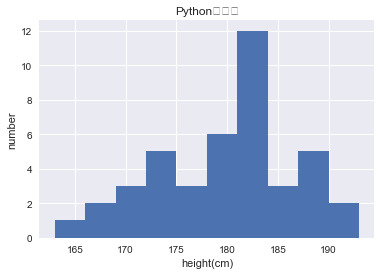

In [116]:
%matplotlib inline                    # 这句话什么含义
import matplotlib.pyplot as plt
import seaborn;seaborn.set()         # 设置绘制风格
plt.hist(heights)
plt.title('Python中图表')            # 中文字符出现乱码 
plt.xlabel('height(cm)')
plt.ylabel('number')                # number是个什么

## 2.5 数组的计算:广播
用于不同大小的数组的二元通用函数(加,减,乘等)的一组规则.

前面提到:对于同样大小的数组, 二元运算符是对应元素相加    # 啥叫二元运算符

In [117]:
import numpy as np
a = np.array([1,2,3])
b = np.array([2,4,6])
a + b

array([3, 6, 9])

广播允许二元运算符用于不同大小的数组. 可以简单的将一个标量(0维度数组)和一个数组相加

In [120]:
# 一个一维数组和一个数字相加
print(a)
a + 5

[1 2 3]


array([6, 7, 8])

In [131]:
x1 = np.ones((3,3))     # (3,3)改成(3,6)出错,改成(6,3)不报错
print(a)
print('*'*20)
print(x1)
print('*'*20)
print(a + x1)

[1 2 3]
********************
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
********************
[[2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]]


### 2.5.2 广播的规则
NumPy的广播有严格的规则, 为了解决两个数组的操作

***规则1: 如果两个数组维度上不一样,那么小维度数组的形状会在最左边补1. ***

***规则2:如果两个数组的形状在任何一个维度上都不匹配, 那么数组的形状会沿着维度为1的维度扩展以匹配另外一个数组的维度.***

***规则3:如果两个数组的形状在任何一个维度上都不匹配并且没有任何一个维度等于1, 那么会应发异常. ***

### 如果数组在某个维度上维数为1, 就在此维度上扩充到和另一个数组相同的维数.

In [11]:
import numpy as np
x1 = np.ones((2,3))
x2 = np.arange(3)
print(x1,x1.shape)
print(x2,x2.shape)


[[1. 1. 1.]
 [1. 1. 1.]] (2, 3)
[0 1 2] (3,)


In [13]:
a = np.arange(3).reshape((3,1))
b = np.arange(3)
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### 2.5.3 广播的实际应用

***数组的归一化*** : 标准化
    - 如果有10个观测值, 每个观测值有3个数据, 则用一个10*3的数组存放这组数据. 

In [36]:
x = np.random.random((10,3))
x

array([[0.28753502, 0.17475433, 0.94881717],
       [0.52740059, 0.27324104, 0.59244628],
       [0.92542544, 0.17095336, 0.62074184],
       [0.06765705, 0.53349631, 0.87524914],
       [0.89227924, 0.08936437, 0.29611186],
       [0.47721616, 0.06912199, 0.73611527],
       [0.93768614, 0.63599511, 0.75935363],
       [0.36530949, 0.24510895, 0.26807146],
       [0.68832481, 0.58183014, 0.42614185],
       [0.50222069, 0.88581832, 0.42317545]])

In [38]:
x_mean = x.mean(0)   # 沿着第1维度求均数, 第1维度是列(纵向)
print(x_mean)

[0.56710546 0.36596839 0.59462239]


In [39]:
x1 = x - x_mean
x1

array([[-0.27957044, -0.19121406,  0.35419478],
       [-0.03970487, -0.09272735, -0.00217612],
       [ 0.35831998, -0.19501503,  0.02611944],
       [-0.49944842,  0.16752792,  0.28062674],
       [ 0.32517378, -0.27660402, -0.29851053],
       [-0.0898893 , -0.2968464 ,  0.14149287],
       [ 0.37058067,  0.27002672,  0.16473124],
       [-0.20179597, -0.12085944, -0.32655094],
       [ 0.12121934,  0.21586175, -0.16848055],
       [-0.06488477,  0.51984993, -0.17144695]])

In [32]:
x1.mean(0)

array([ 5.55111512e-17, -1.33226763e-16,  1.11022302e-17])

In [41]:
x = np.random.random((10,3))
x_mean = x.mean(0)       # 数组求平均数, 需要指定是哪个维度
x1 = x - x_mean
x1.mean(0)

array([-6.66133815e-17, -3.33066907e-17, -3.33066907e-17])

***画一个二维函数, 4.6介绍***

## 2.6 比较,掩码和布尔逻辑
比如 : 统计数组中有多少值大于某一个给定值, 或者删除所有超出某些限制的一层点.

In [46]:
import numpy as np
import pandas as pd
#利用pandas提取降雨量数据
path = open(r'E:\Python\Python数据科学手册英文版\notebooks\data\Seattle2014.csv')    # 要么用 / 要么用\\ 要么在前面加r
rainfall = pd.read_csv(path)['PRCP'].values       # 用的是pd,所以类型是数组
print(type(rainfall))
jiangyul = rainfall / 254
jiangyul.shape                    # 365行还是 365列呢 ?

<class 'numpy.ndarray'>


(365,)

用Matplotlib生成下雨天的直方图

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()         # 这三句话的含义在第4章介绍

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <a list of 40 Patch objects>)

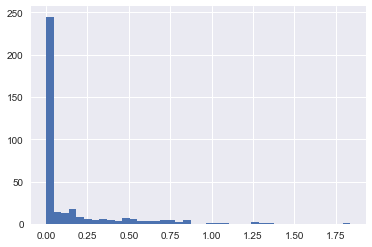

In [49]:
plt.hist(jiangyul,40)         # 第4章解释

### 2.6.2 和通用函数类似的比较操作
之前介绍了 + - * / . 这里介绍其他几种运算符 == != < > <= >=

In [50]:
x = np.array([1,2,3,4,5])
x > 3

array([False, False, False,  True,  True])

In [51]:
x <= 3

array([ True,  True,  True, False, False])

| 运算符 | 对应的通用函数 |
| -- | -- |
| == | np.equal |
| != | np.not_equal |
| < | np.less
| <= | np.less_equal
| > | np.greater
| >= | np.greater_equal


和算术运算符一样, 这些比较运算通用函数也可以用于任意形状,大小的数组. 

In [54]:
rng = np.random.RandomState(0)     # 一种随机数模式 ,以后再了解. 得到的数组会和书本上一样
x = rng.randint(10,size=(3,4))     # 生成一个3*4的数组,数值都在10以内
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [55]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

### 2.6.3 操作布尔数组

In [56]:
np.count_nonzero(x<6)      # np的函数中 cou三个字母开头的只有 count_nonzero(). 用Tab键补齐函数名称 . 此处 x<6 可以看作是一个数组

8

In [57]:
np.sum(x<6)     # x<6 的值是True和False, 和count计数结果一样

8

In [58]:
np.sum(x<6,axis=1)  # 每行中小于6的个数. axis=1是行,axis=0是列

array([4, 2, 2])

In [60]:
np.any(x<8)   #是否有至少一个值小于8
np.all(x<10)  # 是否所有值都小于0
np.all(x==6)  #是否所有值都等于6
np.all(x<8,axis=1)  #是否每行的所有值都小于8

array([ True, False,  True])

逐位逻辑运算符(bitwise logic operator)  & | ^ ~  . 以后再了解

| 运算符 | 对应通用函数 |
| -- | -- |
| & | np.bitwise_and |
| 丨| np.bitwise_or |
| ^ | np.bitwise_xor |
| ~ | np.bitwise_not |

### 2.6.4 将布尔数组做为掩码
用布尔函数作为掩码,通过该掩码选择数据的子数据集

In [61]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [62]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [63]:
x[x<5]

array([0, 3, 3, 3, 2, 4])

***关键字and / or 与逻辑操作运算符 & / 丨的选择***.
and和or判断***整个对象***是真或假, 而 & 和 丨是指***每个对象中的比特位***.??
    - 对于NumPy布尔数组, 后者常用.

## 2.7 花哨的索引
传递的索引是数组,而不是单个标量

### 2.7.1 探索花哨的索引
传递一个索引数组来一次性获得多个数组元素. 

In [2]:
import numpy as np
rand = np.random.RandomState(42)
x = rand.randint(100,size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [66]:
# 根据之前的内容, 获取三个元素的方法
[x[3], x[7], x[9]]

[71, 86, 74]

In [67]:
# 根据索引数组
ind = [3,7,9]
x[ind]

array([71, 86, 74])

***利用花哨索引,结果的形状与索引数组的形状一直, 而不是与被索引数组形状一直.***

In [69]:
ind = np.array([[3,7],
              [4,5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [4]:
x = np.arange(12).reshape((3,4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [5]:
row = np.array([0,1,2])
col = np.array([2,1,3])
x[row,col]    # 第1行,第3列; 第2行,第2列; 第3行,第4列.

array([ 2,  5, 11])

### 2.7.2 组合索引
花哨索引和其他索引组合

In [6]:
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

将花哨索引和简单索引组合

In [8]:
x[2,[2,0,1]]  # 第3行 ,第3列 1列和2列

array([10,  8,  9])

In [9]:
x[1:,[2,0,1]]  #第2行以后的所有行,列是第3,1 2 列

array([[ 6,  4,  5],
       [10,  8,  9]])

### 2.7.3 示例: 选择随机点

花哨索引一个常见用途是从一个矩阵中选择子集.
    - 例如N*D的矩阵,表示在D个维度的N个点

In [12]:
mean = [0,0]
cov = [[1,2],
      [2,5]]
x = rand.multivariate_normal(mean,cov,100)   # 不知道啥意思
x.shape

(100, 2)

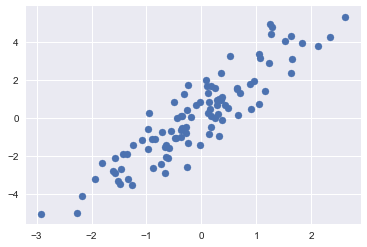

In [14]:
# 利用第4章内容,做可视化图
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()    # 都写了好几遍了
plt.scatter(x[:,0],x[:,1])

***正太分布点***

In [22]:
# 有点深奥了
x1 = np.random.choice(x.shape[0],20,replace=False)
x1

array([96, 88, 69, 47, 14, 46, 28,  5, 70, 43, 57,  6, 18, 31, 67, 25, 54,
       12, 55, 95])

In [23]:
selection = x[x1]
selection.shape

(20, 2)

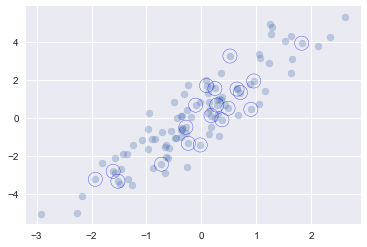

In [24]:
# 还看不懂
plt.scatter(x[:,0],x[:,1],alpha=0.3)
plt.scatter(selection[:,0],selection[:,1],
           facecolor="none",edgecolor ='b',s=200)

常用语快速分隔数据,验证统计模型

***听花哨的索引修改值***

花哨索引可以用来获取部分数组, 也可以用来修改部分数组.

In [26]:
x = np.arange(10)
i = np.array([2,1,8,4])
x[i] =99
x

array([ 0, 99, 99,  3, 99,  5,  6,  7, 99,  9])

操作中重复的索引会导致一些错误

In [30]:
x= np.zeros(10)
print(x)
x[[0,0]] = [4,6]    # x[[0,0]]表示啥意思
x

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 示例: 数据区间划分

比如 : 我们有1000个值,希望快速统计分布在每个区间中的数据频次, 可以用ufunc.at来计算

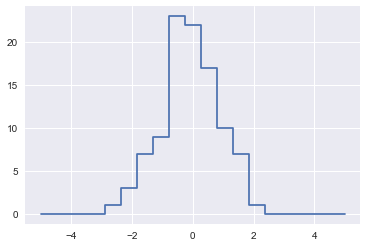

In [34]:
np.random.seed(42)
x = np.random.randn(100)
#手动计算直方图
bins = np.linspace(-5,5,20)
counts = np.zeros_like(bins)

# 为每个x找到合适的区间
i = np.searchsorted(bins,x)

# 为每个区间加1
np.add.at(counts,i,1)
# 画出结果
plt.plot(bins,counts,linestyle='steps')

Matplotlib提供了plt.hist()方法,该方法仅用一行代码就实现上述功能

(array([ 0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,  7.,
         1.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 <a list of 1 Patch objects>)

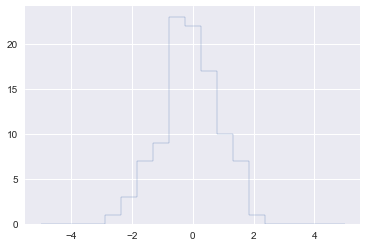

In [35]:
plt.hist(x,bins,histtype="step")

## 2.8 数组的排序

    -插入排序
    -选择排序
    -归并排序
    -快速排序
    -冒泡排序等

### 2.8.1 NumPy中的快速排序 : np.sort 和np.argsort

Python中内置的排序方法. sort()和sorted(),但效率没有np中的高. 

In [37]:
# 不修改原数组的值,用np.sort
x = np.array([2,1,4,3,5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [38]:
# 如果用排好序的数组替代原来数组, 用sort()方法
x.sort()

In [39]:
# argsort(),返回排好序后的索引值
x = np.array([2,1,4,3,5])
i = np.argsort(x)
i

array([1, 0, 3, 2, 4], dtype=int64)

In [40]:
# 沿着行或列排序,NumPy排序算法中有个一个功能参数axis
rand = np.random.RandomState(42)
x = rand.randint(0,10,(4,6))
x

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [41]:
#对x的每一列排序
np.sort(x,axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [42]:
# 对x的每一行排序
np.sort(x,axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

### 2.8.2 部分排序 : 分隔
找到数组中的第K小的值, NumPy 的np.partition()

In [43]:
x = np.array([7,2,3,1,6,5,4])
np.partition(x,3)       # 2不是第2小的值吗?

array([2, 1, 3, 4, 6, 5, 7])

### 2.8.3 示例:K个最近指
略
## 2.9结构化数据 : NumPy的结构化数组

### 2.9.1 生成机构和数组

In [44]:
np.dtype({'names':('name','age','weight'),'formats':('U10','i4','f8')})

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [47]:
np.dtype([('name','S10'),('age','i4'),('weight','f8')])

dtype([('name', 'S10'), ('age', '<i4'), ('weight', '<f8')])